# Straight line fit to data with 'noise' in both x and y

Uses scipy.ode (rather than curve_fit as we've used before)

Linear regression tries to minimise the sum of the aquares of the 'error'. In 'usual' use (as in curve_fit), the error is the 'y' value residual measured to the fitted line. This is fine unless we have errors in both y AND x. In this case it is better to use the orthoganal distance from the data point to the fitted line - Orthogonal Distance Regression (ODR). So, here we use the scipy odr() function.

I've generatted some 'noisy' data for use here.

Based on https://micropore.wordpress.com/2017/02/07/python-fit-with-error-on-both-axis/
and http://blog.rtwilson.com/orthogonal-distance-regression-in-python/


Index(['xdat', 'ydat', 'xerr', 'yerr'], dtype='object')

<ErrorbarContainer object of 3 artists>

fit parameter 1-sigma error
***************************************************
m = 2.3978746524767756 +- 0.050544299487579346
c = 0.1398599998038662 +- 0.3182244420068162
***************************************************


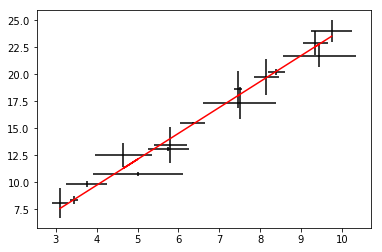

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr

from scipy.stats import linregress

# These 2 lines just allow 'pretty' printing of pandas stuff - non-essential
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Just a simple function to return a straight line for use in ODR.
def stLine(p,x):
    # 'p' is alist containing 'm' and 'c'
    m,c = p
    return m * x  + c

# Read in the data
df = pd.read_csv('stLine_err.csv')

# What column indices do we have? - just for info
df.columns

# Set up x,y,xerrors, yerrors
x=df['xdat']
y=df['ydat']
xerror=df['xerr']
yerror=df['yerr']

# Plot it with error bars
plt.errorbar(x, y, yerr=yerror, xerr=xerror, hold=True, ecolor='k', fmt='none')

# Need to use scipy 'odr' model for fitting. Looks like 'curve_fit' only considers y errors
model = odr.Model(stLine)
# Form an odr 'RealData' object
rdata = odr.RealData(x,y,sx=xerror,sy=yerror)
# Now set up the ODR, 
# We need an initial 'guess' of m and c - beta0 
# We could 'hard wire' this but as we now we are looking at a straight line,
# we'll use scipy.stats.linregress() to get an estimate.
# We need the first 2 elemts returnes which are slope and intercept (m and c)
init_guess = linregress(x,y)[0:2]
odr=odr.ODR(rdata, model, beta0=init_guess )

# Run it and get the results
result_outputs = odr.run()

# Extract the data we need
popt= result_outputs.beta
perr= result_outputs.sd_beta

#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print ('m = ' + str(popt[0])+' +- '+str(perr[0]))
print ('c = ' + str(popt[1])+' +- '+str(perr[1]))
print('***************************************************')

# Now plot the fitted line:
plt.plot(x, stLine((popt[0], popt[1]),x), color='red')
